Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 67.00%
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51

    accuracy                           0.67       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.61      0.67      0.64       200

[[127  22]
 [ 44   7]]


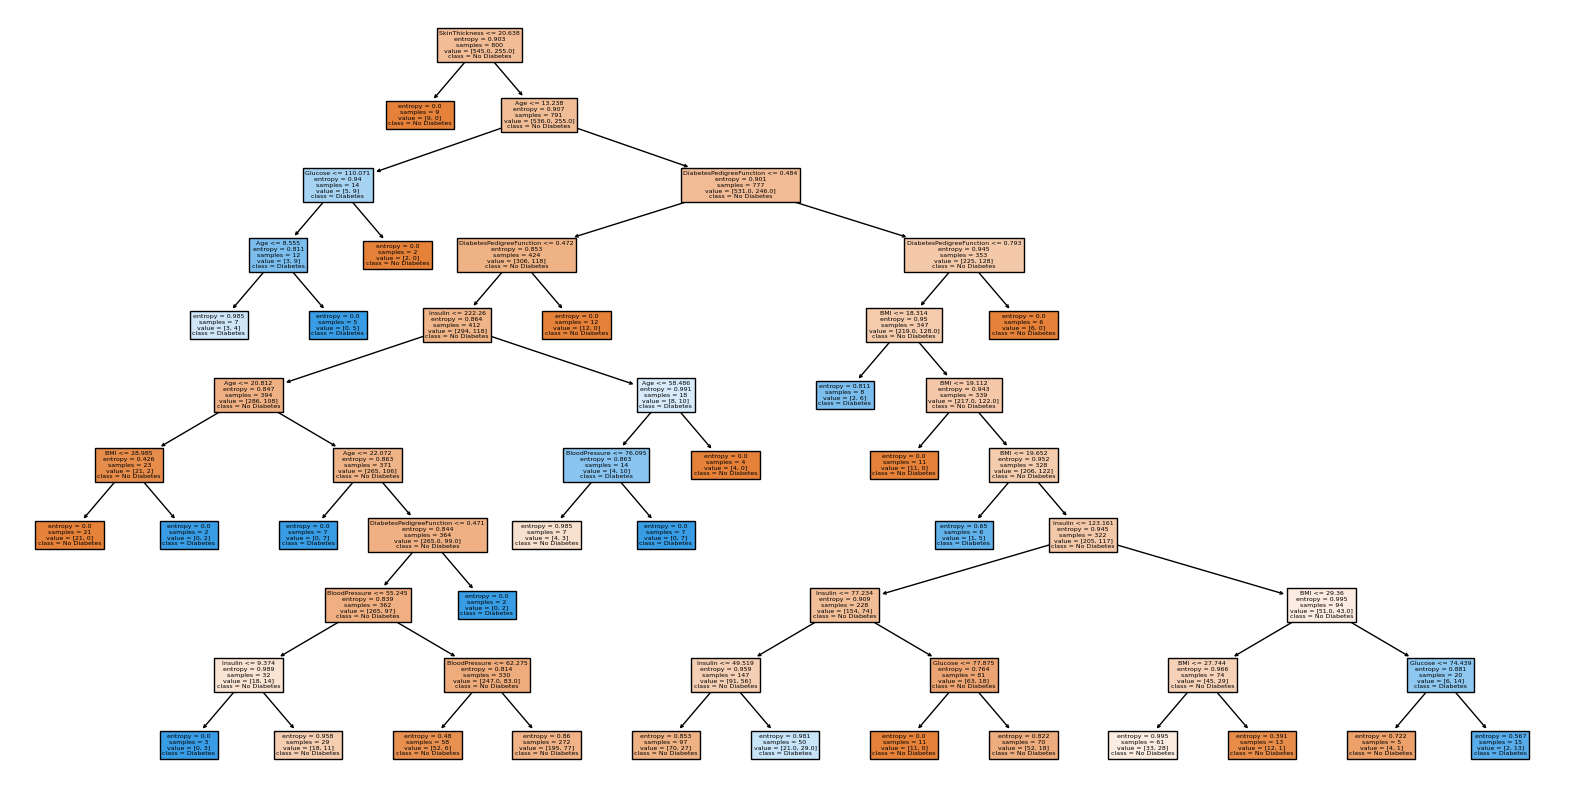

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
best_clf = grid_search.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()


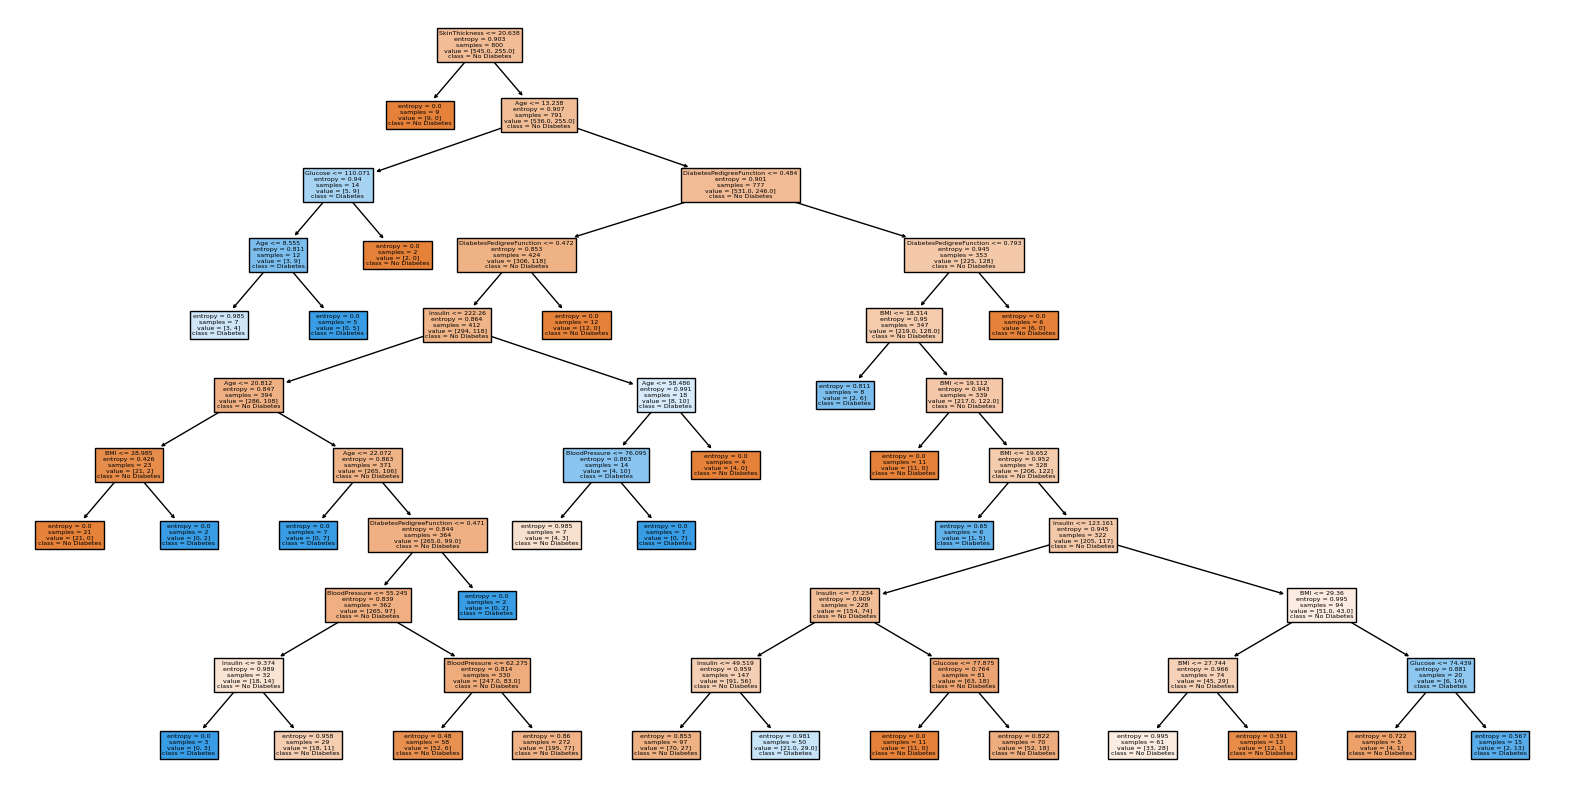

In [60]:
# Visualize the decision tree with ultra-high pixel quality
best_clf = grid_search.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])

# Save the figure with ultra-high dpi
plt.savefig('./data/decision_tree_ultra_high_quality.png', dpi=600)

# Display the plot
plt.show()


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy for training data: 74.88%
Accuracy for testing data: 67.00%
Classification Report for testing data:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51

    accuracy                           0.67       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.61      0.67      0.64       200

Confusion Matrix for testing data:
[[127  22]
 [ 44   7]]


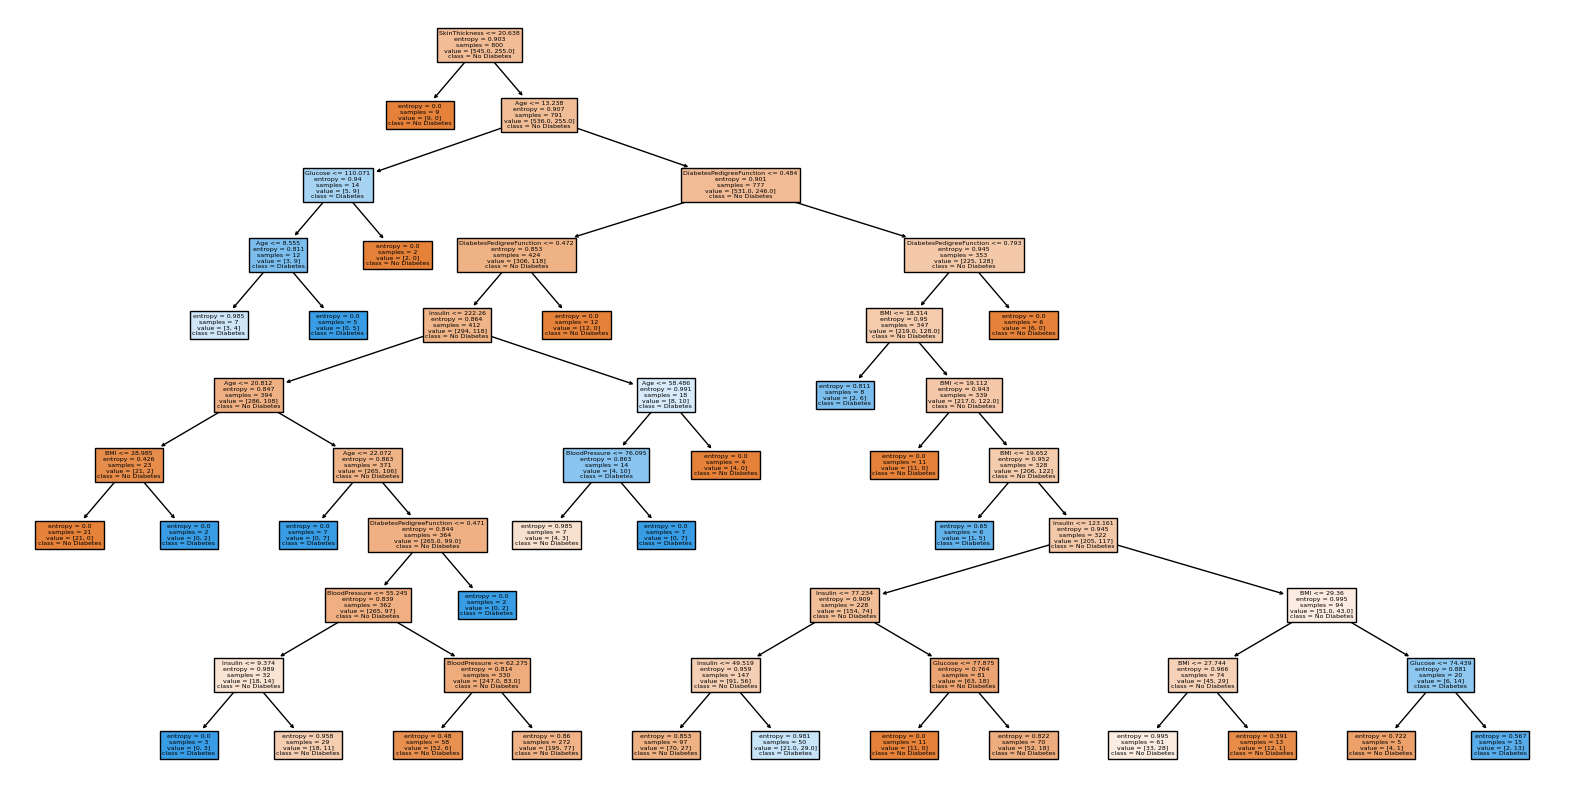

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Accuracy for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy for training data: {accuracy_train * 100:.2f}%')

# Accuracy for testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy for testing data: {accuracy_test * 100:.2f}%')

# Classification Report
print("Classification Report for testing data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix for testing data:")
print(confusion_matrix(y_test, y_pred_test))

# Visualize the decision tree
best_clf = grid_search.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()


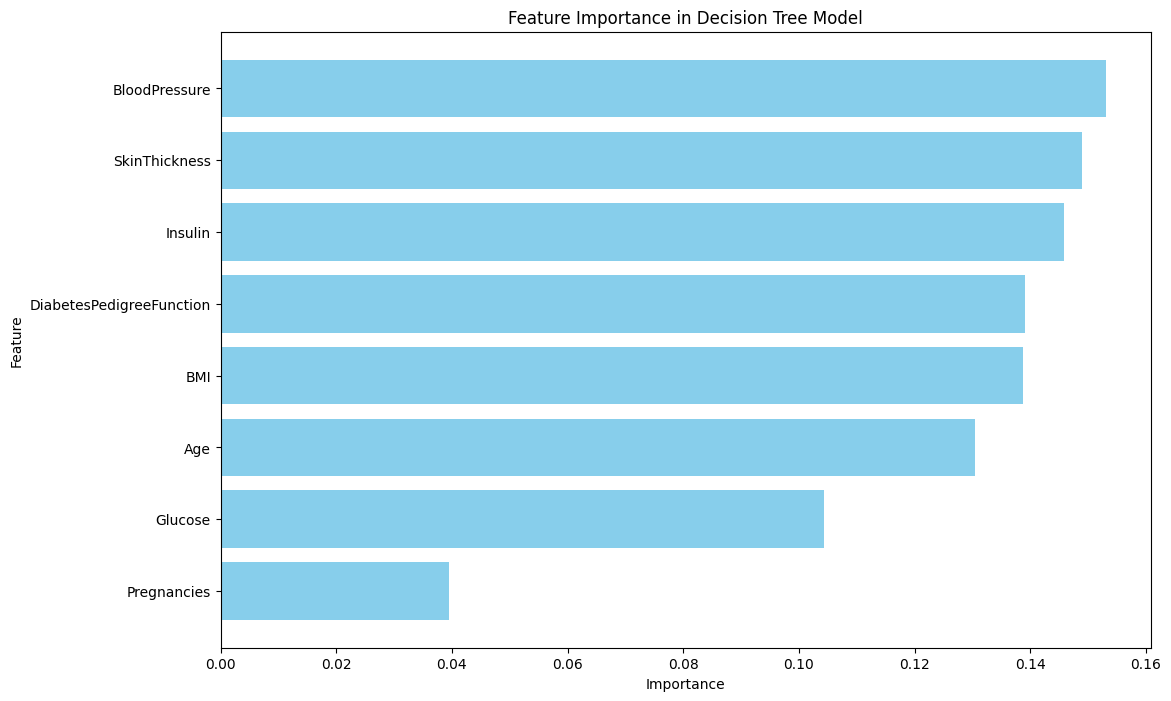

In [97]:
# Extract feature importances
feature_importances = best_clf.feature_importances_

# Create a DataFrame to store feature importances along with their names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

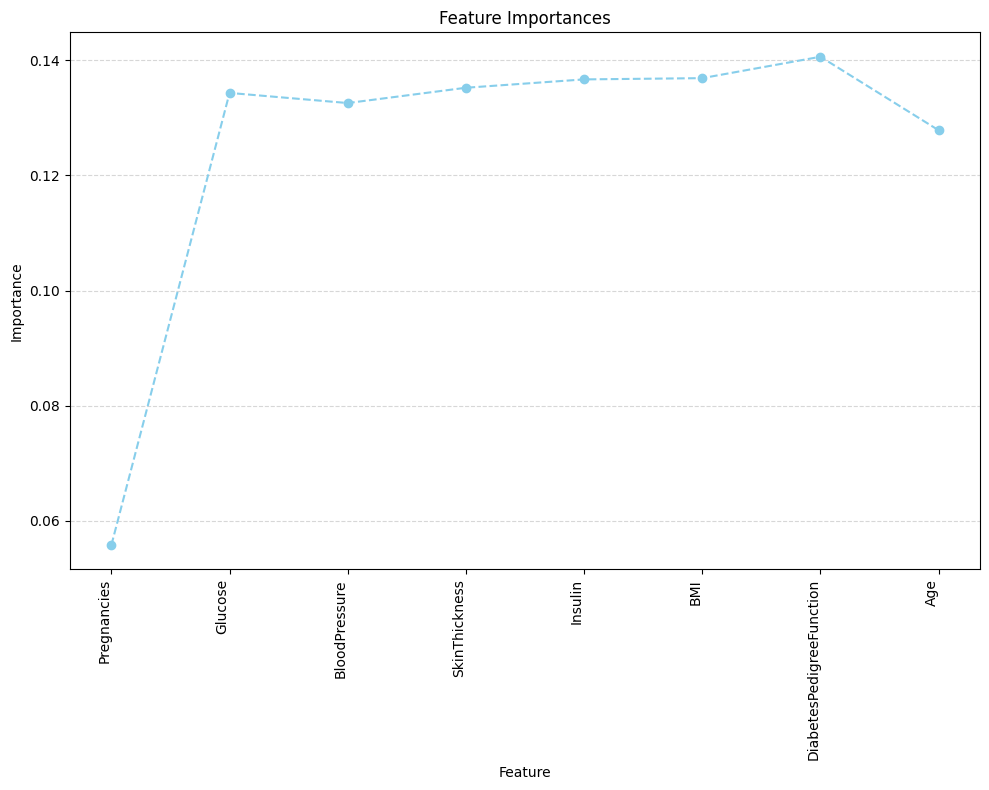

In [104]:
import matplotlib.pyplot as plt

# Extract feature importances and feature names
importances = grid_search.best_estimator_.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance
#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a line plot
plt.figure(figsize=(10, 8))
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance'], marker='o', color='skyblue', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize XGBoost classifier
clf = XGBClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))



Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.7}
Accuracy: 74.50%
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200

[[149   0]
 [ 51   0]]


c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])

print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    140                   9
Actual Diabetes                        49                   2


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Calculate class weights
class_weights = len(y_train) / (2 * pd.value_counts(y_train))

# Initialize XGBoost classifier with class weights
clf = XGBClassifier(random_state=42, scale_pos_weight=class_weights[0])

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Accuracy for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy for training data: {accuracy_train * 100:.2f}%')

# Accuracy for testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy for testing data: {accuracy_test * 100:.2f}%')

# Classification Report for testing data
print("Classification Report for testing data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix for testing data
print("Confusion Matrix for testing data:")
print(confusion_matrix(y_test, y_pred_test))


C:\Users\Megha\AppData\Local\Temp\ipykernel_37492\3683330963.py:18: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_weights = len(y_train) / (2 * pd.value_counts(y_train))


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.7}
Accuracy for training data: 68.12%
Accuracy for testing data: 74.50%
Classification Report for testing data:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200

Confusion Matrix for testing data:
[[149   0]
 [ 51   0]]


c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

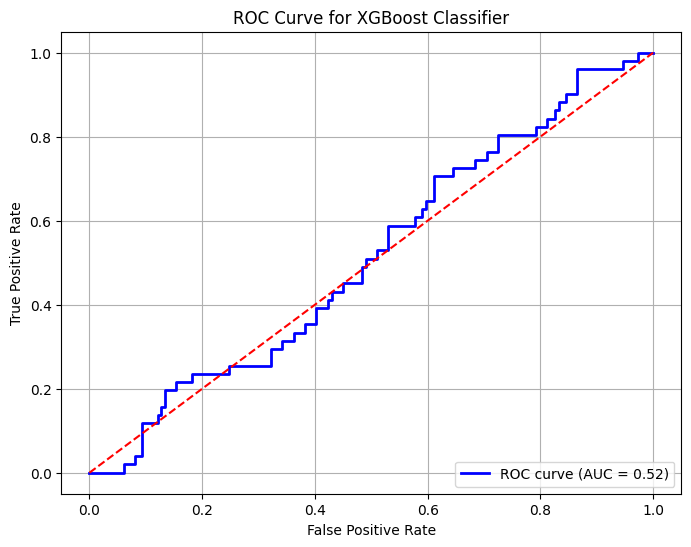

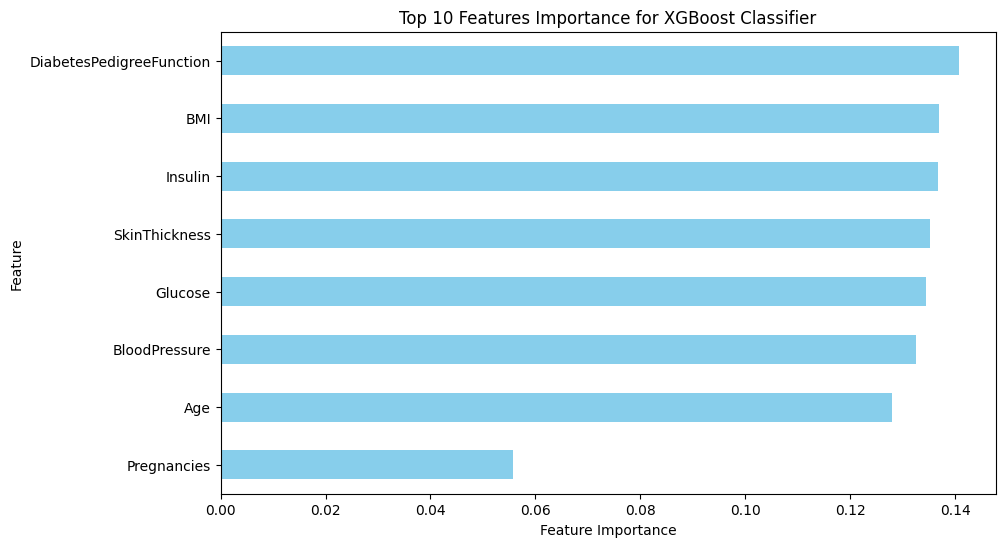

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Features Importance for XGBoost Classifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize standard Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=10000)  # Increased max_iter for convergence

# Fit the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Accuracy for Logistic Regression on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Logistic Regression Accuracy on Training Data: {accuracy_train * 100:.2f}%')

# Accuracy for Logistic Regression on testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Logistic Regression Accuracy on Testing Data: {accuracy_test * 100:.2f}%')

# Classification Report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Logistic Regression Accuracy on Training Data: 68.12%
Logistic Regression Accuracy on Testing Data: 74.50%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200

Logistic Regression Confusion Matrix:
[[149   0]
 [ 51   0]]


c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

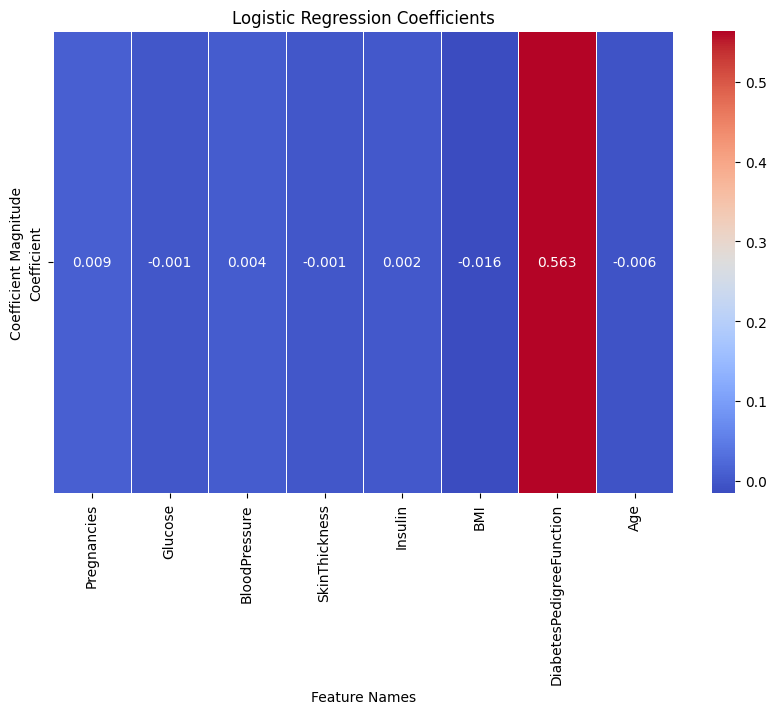

In [102]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=10000)  # Increase max_iter if convergence warning occurs

# Fit the model
model.fit(X_train, y_train)

# Extract coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame with feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Set 'Feature' column as the index for the DataFrame
coefficients_df.set_index('Feature', inplace=True)

# Pivot the coefficients DataFrame for heatmap
heatmap_data = coefficients_df.transpose()

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".3f", linewidths=.5)
plt.xlabel('Feature Names')
plt.ylabel('Coefficient Magnitude')
plt.title('Logistic Regression Coefficients')
plt.show()


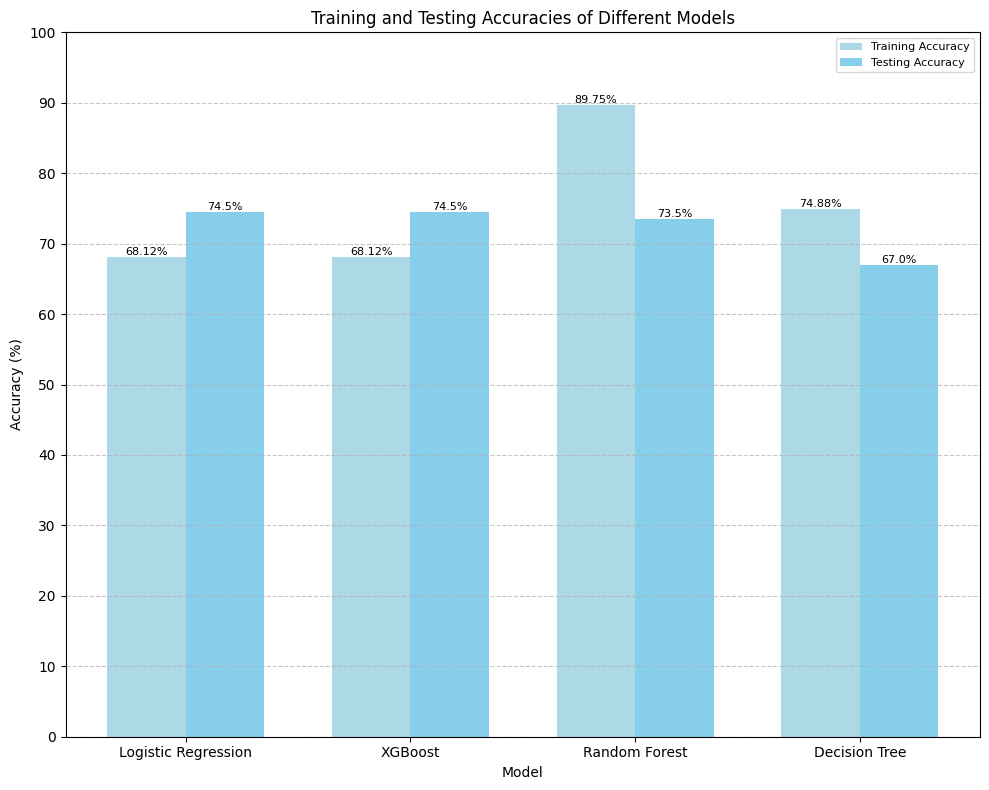

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Training and Testing Accuracies for each model
train_accuracies = {
    'Logistic Regression': 68.12,
    'Decision Tree': 74.88,
    'Random Forest': 89.75,
    'XGBoost': 68.12
}

test_accuracies = {
    'Logistic Regression': 74.50,
    'Decision Tree': 67.00,
    'Random Forest': 73.50,
    'XGBoost': 74.50
}

# Convert dictionaries to DataFrames
df_train = pd.DataFrame(list(train_accuracies.items()), columns=['Model', 'Accuracy'])
df_test = pd.DataFrame(list(test_accuracies.items()), columns=['Model', 'Accuracy'])

# Merge DataFrames on 'Model'
df_accuracies = pd.merge(df_train, df_test, on='Model', suffixes=('_train', '_test'))

# Sort DataFrame by Test Accuracy
df_accuracies = df_accuracies.sort_values(by='Accuracy_test', ascending=False)

# Plotting
plt.figure(figsize=(10, 8), dpi=100)  # Reduced figure size and increased DPI
bar_width = 0.35
index = np.arange(len(df_accuracies['Model']))

train_bars = plt.bar(index - bar_width/2, df_accuracies['Accuracy_train'], bar_width, color='lightblue', label='Training Accuracy')
test_bars = plt.bar(index + bar_width/2, df_accuracies['Accuracy_test'], bar_width, color='skyblue', label='Testing Accuracy')

# Adding text labels on each bar
for bar in train_bars + test_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval , f"{round(yval, 2)}%", ha='center', va='bottom', fontsize=8)

plt.xlabel('Model', fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=10)
plt.title('Training and Testing Accuracies of Different Models', fontsize=12)
plt.xticks(index, df_accuracies['Model'], rotation=0, fontsize=10)
plt.yticks(np.arange(0, 101, 10))  # Setting y-axis scale from 0 to 100 with intervals of 10
plt.ylim(0, 100)  # Setting y-axis limits
plt.legend(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [56]:
import matplotlib.pyplot as plt

# Classification Reports for testing data
decision_tree_report = """
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51
"""

random_forest_report = """
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       149
           1       0.00      0.00      0.00        51
"""

xgboost_report = """
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51
"""

logistic_regression_report = """
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51
"""

# Combine classification reports
combined_report = f"""
Combined Classification Report:

{decision_tree_report.strip()}
{'-'*50}
{random_forest_report.strip()}
{'-'*50}
{xgboost_report.strip()}
{'-'*50}
{logistic_regression_report.strip()}
"""

print(combined_report)



Combined Classification Report:

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       149
           1       0.24      0.14      0.17        51
--------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       149
           1       0.00      0.00      0.00        51
--------------------------------------------------
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51
--------------------------------------------------
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51



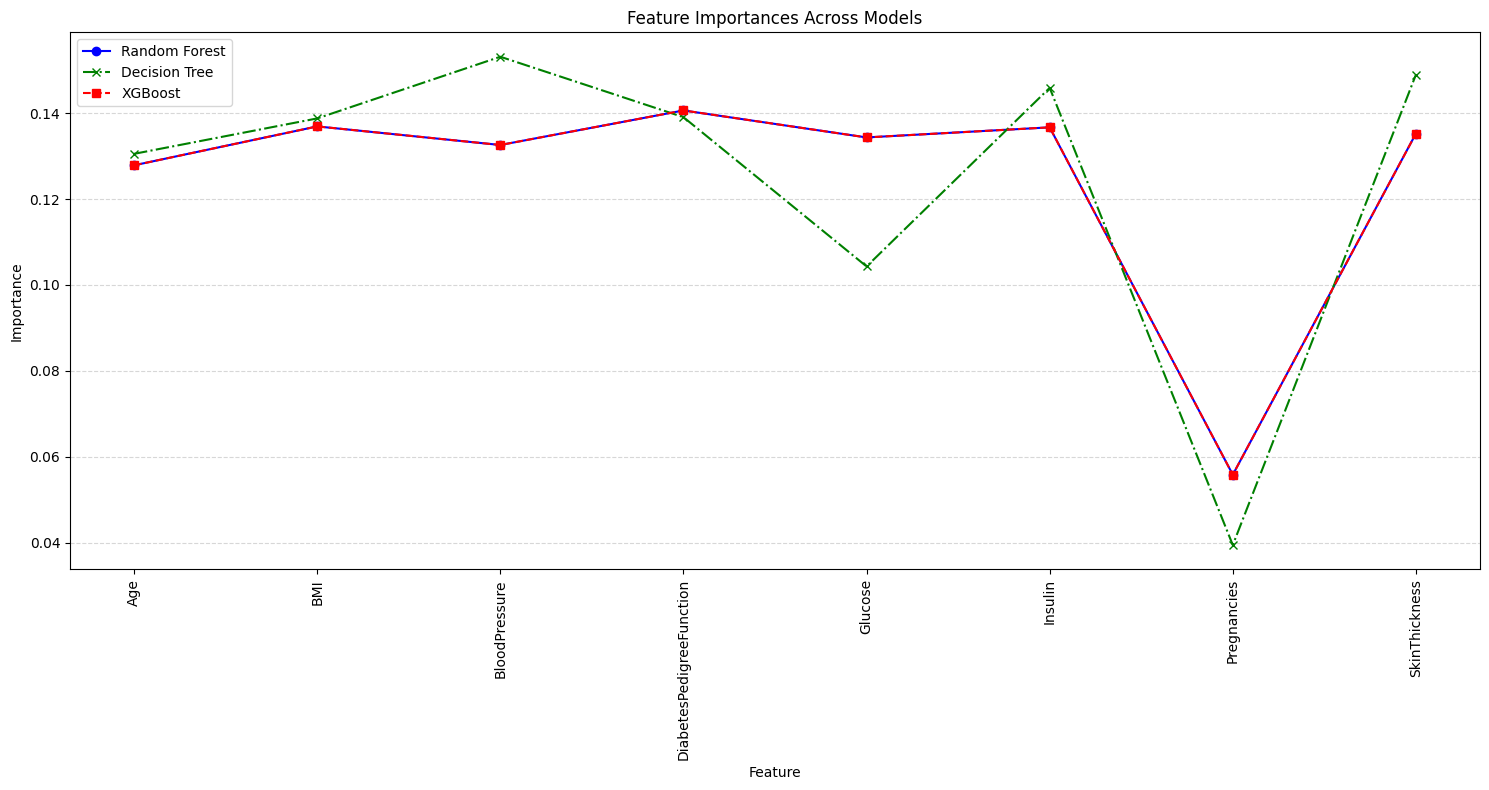

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances for Random Forest
importances_rf = grid_search.best_estimator_.feature_importances_
features_rf = X.columns

# Extract feature importances for Decision Tree
importances_dt = best_clf.feature_importances_

# Extract feature importances for XGBoost
importances_xgb = grid_search.best_estimator_.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importance_df = pd.DataFrame({
    'Feature': features_rf,
    'Importance_RF': importances_rf,
    'Importance_DT': importances_dt,
    'Importance_XGB': importances_xgb
})

# Sort the DataFrame by feature name for clarity
feature_importance_df = feature_importance_df.sort_values(by='Feature')

# Plotting
plt.figure(figsize=(15, 8))

# Line plot for Random Forest
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance_RF'], marker='o', label='Random Forest', color='blue', linestyle='-')

# Line plot for Decision Tree
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance_DT'], marker='x', label='Decision Tree', color='green', linestyle='-.')

# Line plot for XGBoost
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance_XGB'], marker='s', label='XGBoost', color='red', linestyle='--')

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances Across Models')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


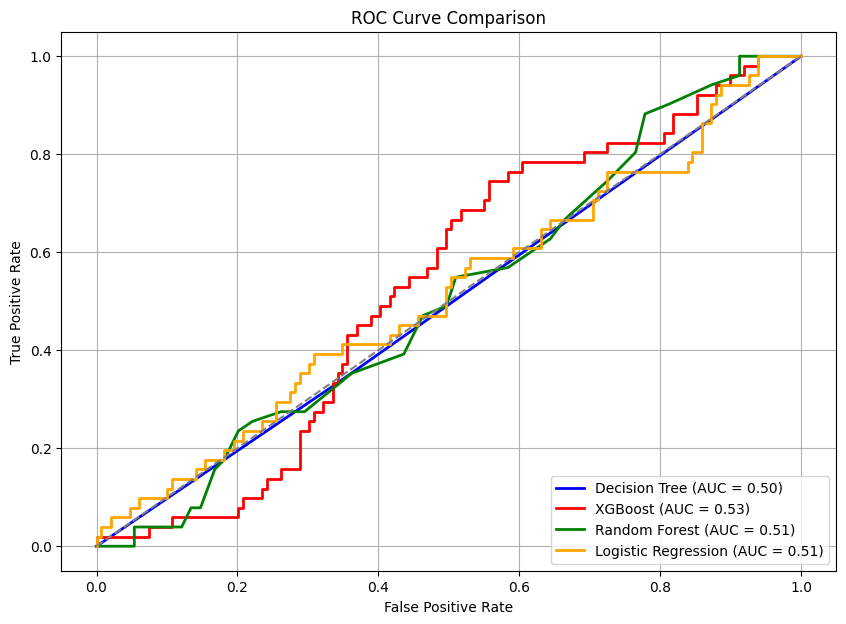

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
file_path = './data/Diabetes_prediction.csv'
df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=87)

# Fit the Decision Tree model
clf_dt.fit(X_train, y_train_encoded)

# Predict probabilities for Decision Tree
y_pred_proba_dt = clf_dt.predict_proba(X_test)[:, 1]

# Initialize XGBoost classifier
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=87)

# Fit the XGBoost model
clf_xgb.fit(X_train, y_train_encoded)

# Predict probabilities for XGBoost
y_pred_proba_xgb = clf_xgb.predict_proba(X_test)[:, 1]

# Initialize Random Forest classifier
clf_rf = RandomForestClassifier(random_state=87)

# Fit the Random Forest model
clf_rf.fit(X_train, y_train)

# Predict probabilities for Random Forest
y_pred_proba_rf = clf_rf.predict_proba(X_test)[:, 1]

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(random_state=87, max_iter=10000)

# Fit the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predict probabilities for Logistic Regression
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_encoded, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_encoded, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for all classifiers
plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [113]:
# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_encoded, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_encoded, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Print the thresholds
print(f"Decision Tree thresholds: {thresholds_dt}")
print(f"XGBoost thresholds: {thresholds_xgb}")
print(f"Random Forest thresholds: {thresholds_rf}")
print(f"Logistic Regression thresholds: {thresholds_lr}")


Decision Tree thresholds: [inf  1.  0.]
XGBoost thresholds: [       inf 0.9476094  0.75610256 0.7516537  0.6868327  0.6799963
 0.5436037  0.5263805  0.51548827 0.5093604  0.4491394  0.4341145
 0.42363477 0.41447732 0.3993153  0.39475855 0.37218156 0.33991575
 0.33511335 0.3321031  0.3212974  0.32111624 0.29452336 0.2841071
 0.28076184 0.2688505  0.26830393 0.26815468 0.26238045 0.25258917
 0.24574022 0.23742905 0.23612542 0.21868211 0.21243376 0.20767558
 0.2034084  0.19012861 0.17783126 0.17238083 0.17084551 0.1632519
 0.15637366 0.15422216 0.1498202  0.14550377 0.14356011 0.13735458
 0.13485818 0.13040653 0.1247656  0.12115928 0.11963785 0.11941435
 0.10957027 0.10853563 0.10703658 0.10167356 0.0947139  0.09009732
 0.08521201 0.08445594 0.06603274 0.06413984 0.05751072 0.05584946
 0.03876555 0.03666354 0.03489378 0.03292461 0.025128   0.02471545
 0.02084777 0.01994834 0.01524387 0.01474863 0.0122949  0.01050812
 0.00930061 0.00872629 0.00336779]
Random Forest thresholds: [ inf 0.61 0

In [112]:
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd


from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model with increased max_iter
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# ... (rest of the code remains the same for feature importance and classification report)


# Assuming you already have your data loaded as X and y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Get feature importance for logistic regression
coefficients = log_reg.coef_[0]
sorted_indices_log_reg = np.argsort(np.abs(coefficients))[::-1]
feature_names = X.columns

print("Logistic Regression Feature Importance:")
for idx in sorted_indices_log_reg:
    print(f"{feature_names[idx]}: {coefficients[idx]}")

# Get feature importance for XGBoost
importance = xgb_model.get_booster().get_score(importance_type='weight')
sorted_importance_xgb = sorted(importance.items(), key=lambda x: x[1], reverse=True)

print("\nXGBoost Feature Importance:")
for feature, score in sorted_importance_xgb:
    print(f"{feature}: {score}")

# Predictions and classification report for logistic regression
y_pred_log_reg = log_reg.predict(X_test)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# Predictions and classification report for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))


c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Feature Importance:
DiabetesPedigreeFunction: 0.5460241313647205
SkinThickness: -0.022870221387862717
BMI: -0.018213264836802762
Pregnancies: 0.007586564583581136
Age: -0.0062808226854143695
BloodPressure: 0.0038061335705823454
Insulin: 0.0016621369623139517
Glucose: -0.0016229391060611142

XGBoost Feature Importance:
Insulin: 280.0
Age: 275.0
DiabetesPedigreeFunction: 271.0
SkinThickness: 268.0
BloodPressure: 264.0
BMI: 260.0
Glucose: 242.0
Pregnancies: 68.0

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       

c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo